# **HEALTH INSURANCE RECOMMENDER SYSTEM**

# **1. Business Understanding**

## **Introduction**  
Health insurance plays a crucial role in ensuring individuals can access quality healthcare when needed. Choosing the right insurance policy is not just a financial decision—it can be a matter of life and death. With numerous options available, selecting a policy that aligns with one's needs, preferences, and financial capacity is critical. A well-matched insurance plan can provide peace of mind and financial security, while a poor choice can lead to unnecessary expenses and coverage gaps.  

## **Problem Statement**  
Selecting the right health insurance policy is often a daunting task. The vast number of available plans, combined with varying coverage options and benefits, makes decision-making complex and overwhelming. Many individuals struggle to navigate these choices, leading to suboptimal coverage that may not fully meet their healthcare needs.  

By leveraging AI and data science, we can develop a recommender system that helps individuals identify the most suitable insurance plan based on their health conditions, financial situation, and personal preferences. This system will simplify the decision-making process, ensuring clients receive the best value for their money while avoiding common pitfalls associated with selecting insurance policies.  

## **Key Stakeholders**  
- **Insurance Companies**  
  - Enhance customer experience by recommending policies that best fit clients' needs, improving efficiency and increasing approval rates.  
- **Working-Class Individuals**  
  - Gain access to insurance plans tailored to their health conditions and financial status, reducing the risk of selecting unsuitable policies.  
- **Healthcare Organizations (Hospitals, Health Ministries, etc.)**  
  - Provide informed guidance to patients, improving public health outcomes through better insurance coverage.  


# **2. Data Understanding**

## **Data Source**  
The dataset used for this project is a **synthetically generated health insurance dataset**, created using ChatGPT. It simulates real-world health insurance data, capturing key attributes relevant to policy recommendations. While synthetic, the dataset is designed to reflect realistic distributions and relationships found in actual insurance data.  

## **Data Characteristics**  
- **Number of Instances:** 52,500 records  
- **Number of Features:** 42 attributes  
- **Data Types:** A mix of categorical and numerical variables  
- **Missing Values:** Present in some key attributes, requiring appropriate imputation strategies  

## **Key Features**  
The dataset contains various features related to individuals seeking health insurance, including:  
- **Demographics**: Age, employment status, number of dependents, region  
- **Health Factors**: Pre-existing conditions, chronic illness coverage, medication coverage, maternity coverage  
- **Financial Data**: Monthly income, current health expenditure, previous insurance coverage  
- **Insurance Preferences**: Preferred coverage type, hospital preference, emergency coverage, dental and vision coverage  
- **Policy Details**: Insurance provider, waiting period, policy expiry date, duplicate plan cost  
- **User Experience**: User satisfaction rating, recommended plan  

## **Data Limitations**  
- **Synthetic Nature:** Since the dataset is artificially generated, it may not capture all the nuances of real-world insurance data. Some relationships may be oversimplified or lack real-world complexity.  
- **Potential Biases:** The dataset might inherit biases from the generation process, which could affect model generalizability.  
- **Missing Values:** Certain key features contain missing data, requiring thoughtful handling to maintain data integrity.  

## **Potential Challenges**  
- **Data Imbalance:** Some categories may be underrepresented, impacting model predictions.  
- **Feature Engineering:** Creating meaningful features from categorical and numerical attributes to improve predictive performance.  
- **Handling Missing Data:** Developing a robust imputation strategy to address gaps without introducing bias.  
- **Ethical Considerations:** Ensuring fairness in predictions, particularly when dealing with sensitive attributes like income and health conditions.  


# 3.Data Preparation

## Data Inspection


In [38]:
# import pandas

import pandas as pd
# Read csv
df= pd.read_csv('../health_insurance_recommender.csv')

In [39]:
df.shape

(52500, 42)

- The dataset is quite large, It has `52500` rows, `42` columns

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      52500 non-null  int64  
 1   age                          49859 non-null  float64
 2   gender                       52500 non-null  object 
 3   country                      52500 non-null  object 
 4   region                       52500 non-null  object 
 5   employment_status            52500 non-null  object 
 6   monthly_income               49864 non-null  float64
 7   pre_existing_conditions      52500 non-null  object 
 8   number_of_dependents         52500 non-null  int64  
 9   current_health_expenditure   52500 non-null  float64
 10  hospital_preference          52500 non-null  object 
 11  previous_insurance_coverage  52500 non-null  object 
 12  preferred_coverage_type      52500 non-null  object 
 13  insurance_provid

In [41]:
# info csv
df.isna().sum()

user_id                           0
age                            2641
gender                            0
country                           0
region                            0
employment_status                 0
monthly_income                 2636
pre_existing_conditions           0
number_of_dependents              0
current_health_expenditure        0
hospital_preference               0
previous_insurance_coverage       0
preferred_coverage_type           0
insurance_provider                0
plan_cost                         0
deductible_amount                 0
out_of_pocket_max                 0
medication_coverage               0
maternity_coverage                0
chronic_illness_coverage          0
emergency_coverage                0
dental_coverage                   0
vision_coverage                   0
user_satisfaction_rating       2619
recommended_plan                  0
policy_expiry_date                0
duplicate_plan_cost               0
duplicate_country           

- Some columns , have some missing values.This will be handled in data cleaning phase

## Data Description

Below is the description of the target and featues from the documentation


| #  | Feature                        | Definition  |
|----|--------------------------------|----------------------------------------------------------|
| 1  | user_id                        | Unique identifier for each user  |
| 2  | age                             | Age of the user  |
| 3  | gender                          | Gender of the user (Male, Female, Other)  |
| 4  | country                         | Country of residence  |
| 5  | monthly_income                  | User's monthly income in USD  |
| 6  | health_condition                | Primary health condition of the user (e.g., Diabetes, Hypertension, Asthma)  |
| 7  | plan_cost                       | Monthly cost of the insurance plan in USD  |
| 8  | deductible_amount               | Amount user pays before insurance covers expenses  |
| 9  | out_of_pocket_max               | Maximum amount user pays per year before full coverage  |
| 10 | family_size                     | Number of dependents in the family  |
| 11 | marital_status                  | User's marital status (Single, Married, Divorced, Widowed)  |
| 12 | employment_type                 | User's employment type (Salaried, Self-employed, Unemployed)  |
| 13 | education_level                 | Highest level of education attained by the user  |
| 14 | recent_hospital_visits          | Number of hospital visits in the past year  |
| 15 | smoking_habit                   | Whether the user smokes (Yes, No)  |
| 16 | alcohol_consumption             | Whether the user consumes alcohol (Yes, No)  |
| 17 | existing_medications            | Whether the user is on long-term medication (Yes, No)  |
| 18 | disability_status               | Whether the user has a disability (Yes, No)  |
| 19 | co_payment_preference           | User's preference for co-payment level (Low, Medium, High)  |
| 20 | lifetime_coverage_limit         | Maximum lifetime coverage amount in USD  |
| 21 | claim_reimbursement_speed       | Speed of claim reimbursement (Fast, Medium, Slow)  |
| 22 | insurance_effective_time        | Time taken for the insurance plan to start being effective (in days)  |
| 23 | target_plan                     | Recommended insurance plan based on user profile  |


## Features Missing Descriptions  

The following features are present in the dataset but are not yet described:  

- **`region`**  
- **`employment_status`**  
- **`pre_existing_conditions`**  
- **`number_of_dependents`**  
- **`current_health_expenditure`**  
- **`hospital_preference`**  
- **`previous_insurance_coverage`**  
- **`preferred_coverage_type`**  
- **`insurance_provider`**  
- **`medication_coverage`**  
- **`maternity_coverage`**  
- **`chronic_illness_coverage`**  
- **`emergency_coverage`**  
- **`dental_coverage`**  
- **`vision_coverage`**  
- **`user_satisfaction_rating`**  
- **`recommended_plan`**  
- **`policy_expiry_date`**  
- **`duplicate_plan_cost`**  
- **`duplicate_country`**  
- **`waiting_period_months`**  
- **`preferred_hospital`**  



## Data Cleaning

### Checking for duplicates and missing values

In [42]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Display columns with missing values
print("\nNumber of missing values in each column:")
for column in df.columns:
    missing_values = df[column].isnull().sum()
    if missing_values > 1:
        print(f"{column}: {missing_values}")

Number of duplicate rows: 0

Number of missing values in each column:
age: 2641
monthly_income: 2636
user_satisfaction_rating: 2619


- There are no duplicated rows. However, 3 columns have missing data. Before imputing/ deleting missing rows lets plot their distribution


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

Visualizing numerical columns:


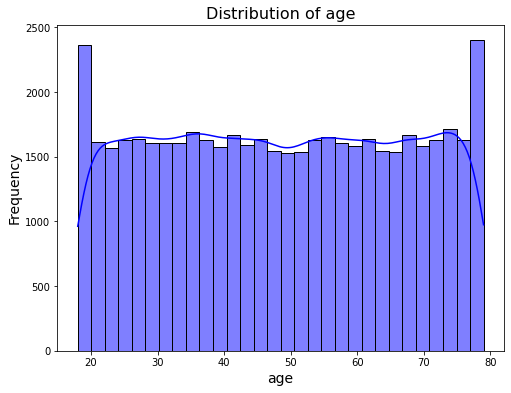

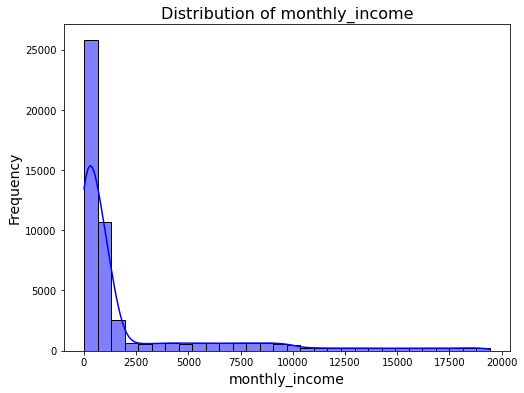

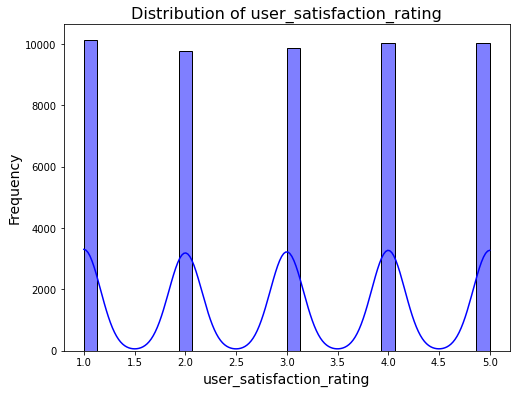

In [44]:
# Plot numerical columns
print("Visualizing numerical columns:")
for column in df[['age','monthly_income','user_satisfaction_rating']].columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()

### **Handling Missing Values: Imputation Strategy**
To ensure data integrity and reduce bias, we have chosen appropriate imputation strategies based on the distribution of each variable.

#### **1. Age (Median Imputation)**
- The distribution of age appears nearly uniform with slight variations.
- Using the **median** is appropriate because:
  - It is robust to outliers.
  - It represents the central tendency of the data without being influenced by extreme values.
  - It maintains the overall structure of the distribution.

#### **2. Monthly Income (Median Imputation)**
- Monthly income is **highly right-skewed**, meaning there are a few extremely high values.
- Using the **median** is preferred because:
  - The mean would be affected by high-income outliers, leading to overestimation.
  - The median provides a more reliable central measure for skewed distributions.
  - It better represents the typical income level without distortion from extreme values.

#### **3. User Satisfaction Rating (Mode Imputation)**
- This variable is **ordinal/categorical**, typically on a scale (e.g., 1-5).
- Using the **mode** is ideal because:
  - It preserves the most common response, maintaining data consistency.
  - It avoids artificially shifting the average rating.
  - It ensures that imputed values align with actual user ratings.

By applying these imputation methods, we maintain the dataset's integrity while minimizing distortion.


In [45]:
# Impute missing values
df['age']= df['age'].fillna(df['age'].median())
df['monthly_income']= df['monthly_income'].fillna(df['monthly_income'].median())
df['user_satisfaction_rating']= df['user_satisfaction_rating'].fillna(df['user_satisfaction_rating'].mode()[0])

In [46]:
# confirm imputation
df.isna().sum()

user_id                        0
age                            0
gender                         0
country                        0
region                         0
employment_status              0
monthly_income                 0
pre_existing_conditions        0
number_of_dependents           0
current_health_expenditure     0
hospital_preference            0
previous_insurance_coverage    0
preferred_coverage_type        0
insurance_provider             0
plan_cost                      0
deductible_amount              0
out_of_pocket_max              0
medication_coverage            0
maternity_coverage             0
chronic_illness_coverage       0
emergency_coverage             0
dental_coverage                0
vision_coverage                0
user_satisfaction_rating       0
recommended_plan               0
policy_expiry_date             0
duplicate_plan_cost            0
duplicate_country              0
waiting_period_months          0
family_size                    0
marital_st

- There are no longer missing values

### Handling Duplicate columns
-Function below drops duplicate columns

In [47]:
def remove_duplicate_columns_by_values(df):
    """
    Removes duplicate columns in a DataFrame based on identical values.
    Prints the names of removed columns while preserving original data types.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
    
    Returns:
        pd.DataFrame: A DataFrame with duplicate columns removed.
    """
    original_dtypes = df.dtypes  # Store original data types
    
    df_T = df.T.drop_duplicates().T  # Transpose, drop duplicate columns, then transpose back
    
    duplicate_cols = [col for col in df.columns if col not in df_T.columns]

    if duplicate_cols:
        print("Removed duplicate columns based on identical values:", duplicate_cols)

    # Restore original data types
    for col in df_T.columns:
        df_T[col] = df_T[col].astype(original_dtypes[col])

    return df_T


In [48]:
df = remove_duplicate_columns_by_values(df)

Removed duplicate columns based on identical values: ['duplicate_country']


- Duplicate rows and columns have been dropped


## EDA (Exploratory Data Analysis)


In [49]:
df.shape

(52500, 41)

- After removing duplicate column, there are now 41 columns

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      52500 non-null  int64  
 1   age                          52500 non-null  float64
 2   gender                       52500 non-null  object 
 3   country                      52500 non-null  object 
 4   region                       52500 non-null  object 
 5   employment_status            52500 non-null  object 
 6   monthly_income               52500 non-null  float64
 7   pre_existing_conditions      52500 non-null  object 
 8   number_of_dependents         52500 non-null  int64  
 9   current_health_expenditure   52500 non-null  float64
 10  hospital_preference          52500 non-null  object 
 11  previous_insurance_coverage  52500 non-null  object 
 12  preferred_coverage_type      52500 non-null  object 
 13  insurance_provid

- Rearranging target to feature as last columns

In [51]:
columns = list(df.columns)
columns.remove('recommended_plan')
columns.append('recommended_plan')
df = df[columns]
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      52500 non-null  int64  
 1   age                          52500 non-null  float64
 2   gender                       52500 non-null  object 
 3   country                      52500 non-null  object 
 4   region                       52500 non-null  object 
 5   employment_status            52500 non-null  object 
 6   monthly_income               52500 non-null  float64
 7   pre_existing_conditions      52500 non-null  object 
 8   number_of_dependents         52500 non-null  int64  
 9   current_health_expenditure   52500 non-null  float64
 10  hospital_preference          52500 non-null  object 
 11  previous_insurance_coverage  52500 non-null  object 
 12  preferred_coverage_type      52500 non-null  object 
 13  insurance_provid

- The features are mixed datatypes, Some are categorical while others are numerical

### Univariate Analysis

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

def univariate_analysis(df):
    """
    Perform univariate analysis on a DataFrame.
    
    - Categorical columns (≤ 5 unique values): Pie chart
    - Categorical columns (> 5 unique values): Bar chart
    - Numerical columns: Histogram with KDE
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
    
    Returns:
        None (Displays plots)
    """
    sns.set_style("whitegrid")  # Clean professional grid style
    colors = sns.color_palette("Set2")  # Customized color palette

    for col in df.columns:
        plt.figure(figsize=(8, 5))

        if df[col].dtype == 'object' or df[col].nunique() < 15:  # Treat as categorical
            value_counts = df[col].value_counts()
            num_categories = len(value_counts)

            if num_categories <= 5:  # Pie chart for small categories
                plt.pie(
                    value_counts, labels=value_counts.index, autopct='%1.1f%%',
                    colors=colors[:num_categories], startangle=140, wedgeprops={'edgecolor': 'black'}
                )
                plt.title(f"Distribution of {col}", fontsize=14, fontweight='bold')

            else:  # Bar chart for large categories
                sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors)
                plt.xticks(rotation=45, ha='right')
                plt.ylabel("Count", fontsize=12)
                plt.title(f"Frequency of {col}", fontsize=14, fontweight='bold')

        else:  # Numerical column
            sns.histplot(df[col], bins=30, kde=True, color=colors[0], edgecolor='black')
            plt.axvline(df[col].median(), color='red', linestyle='dashed', label='Median')
            plt.axvline(df[col].mean(), color='blue', linestyle='dashed', label='Mean')
            plt.legend()
            plt.xlabel(col, fontsize=12)
            plt.ylabel("Density", fontsize=12)
            plt.title(f"Distribution of {col}", fontsize=14, fontweight='bold')

        plt.show()


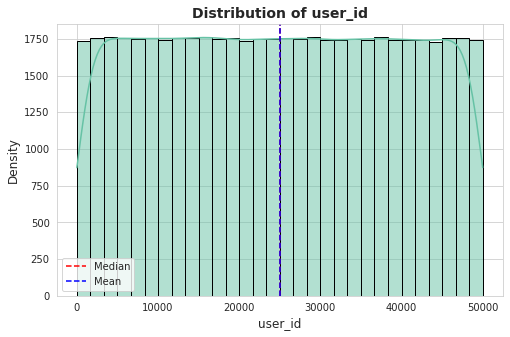

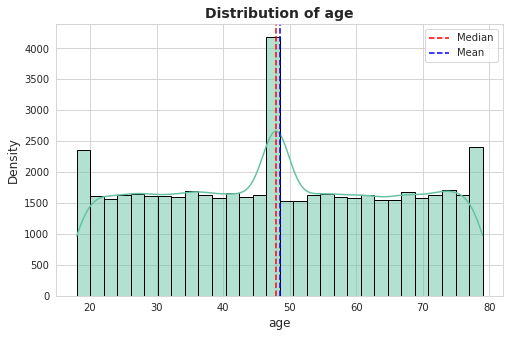

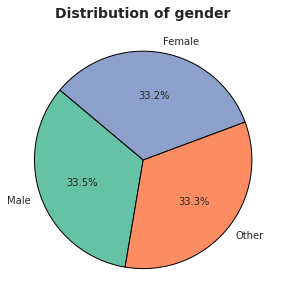

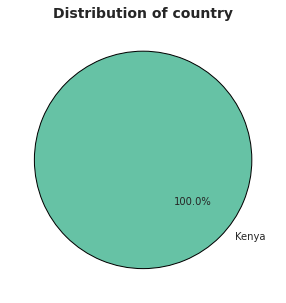

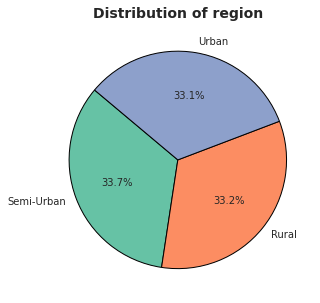

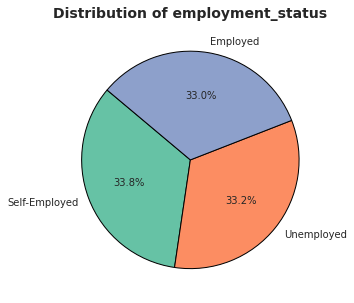

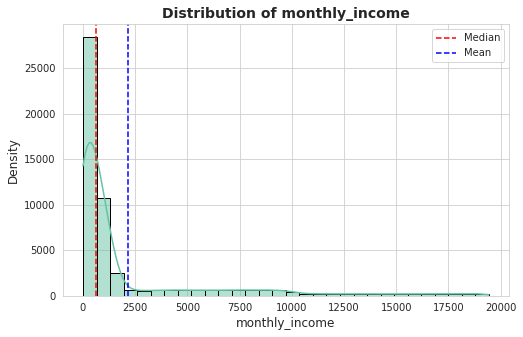

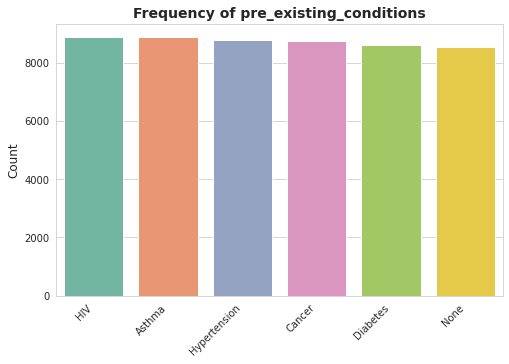

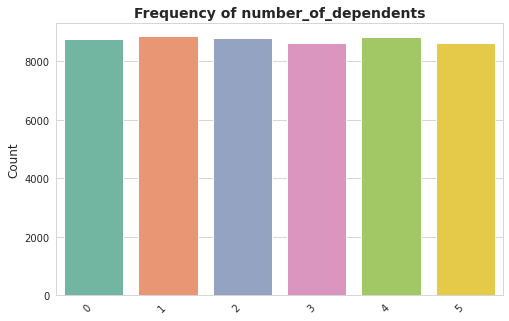

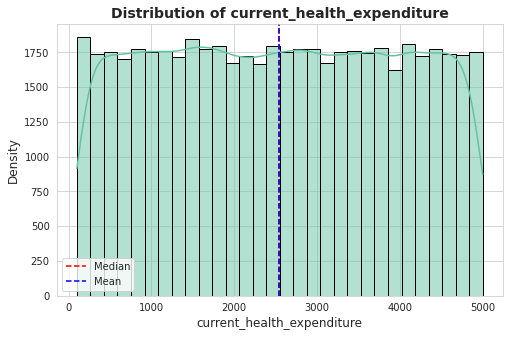

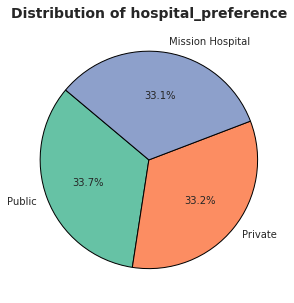

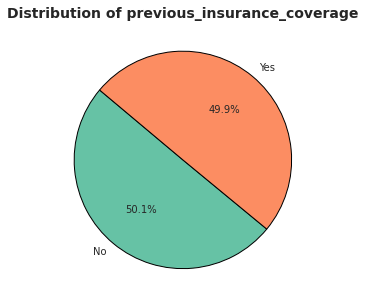

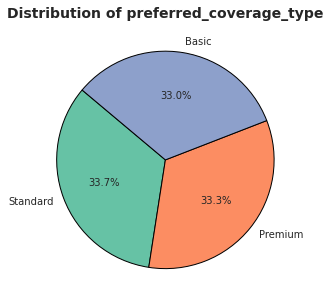

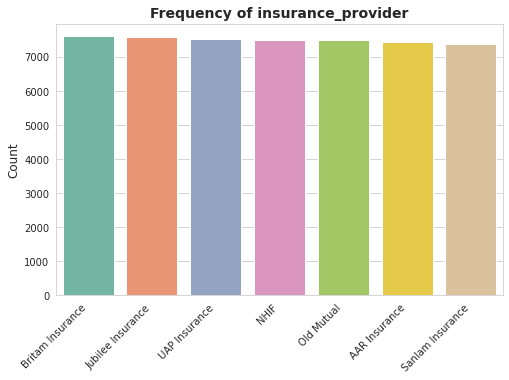

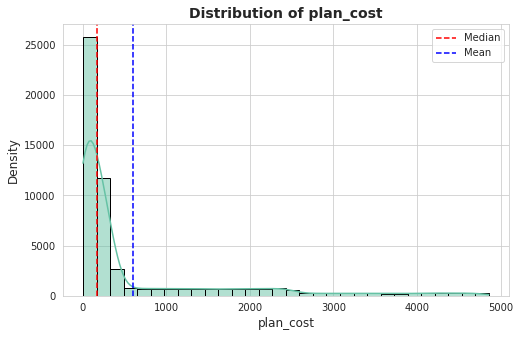

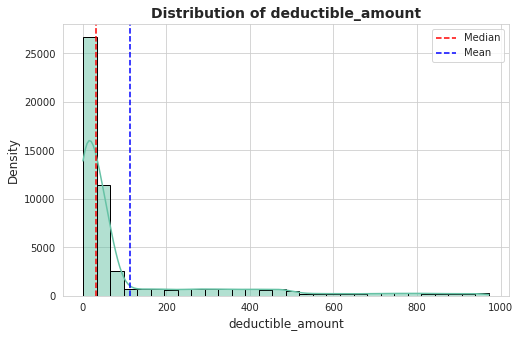

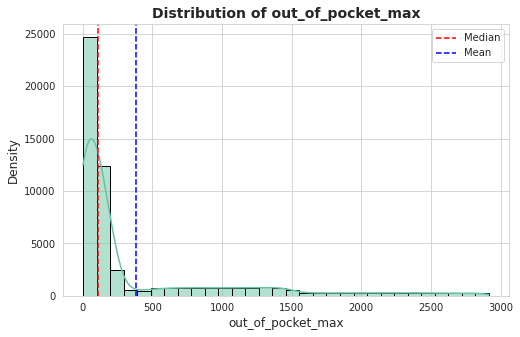

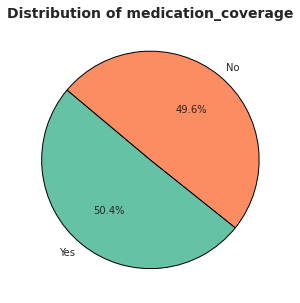

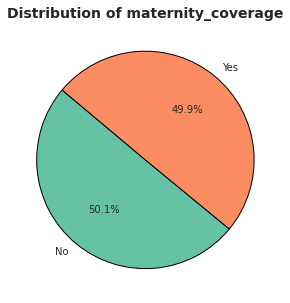

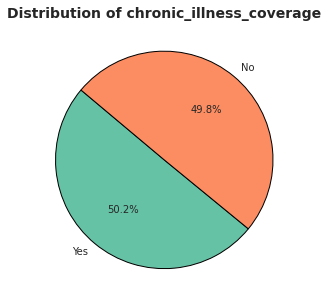

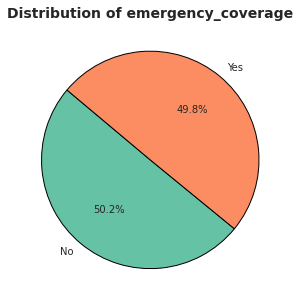

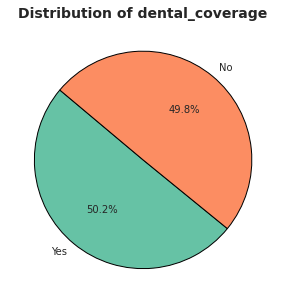

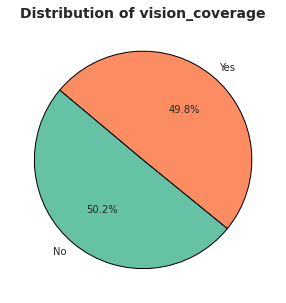

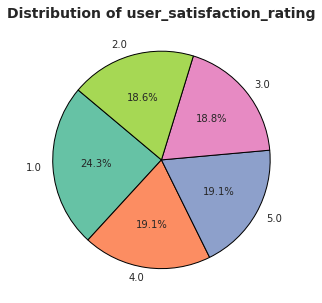

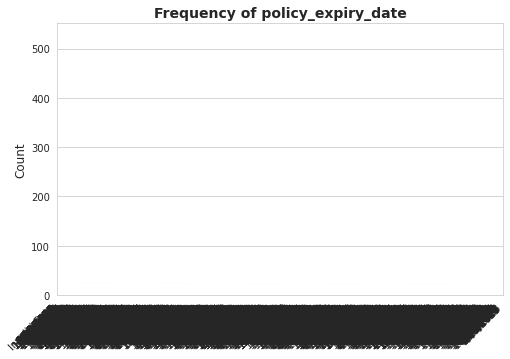

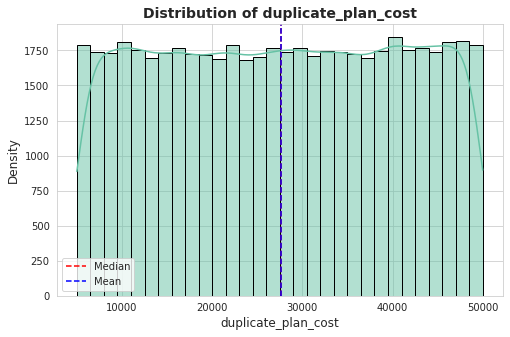

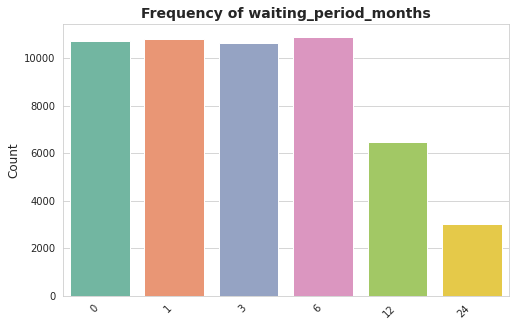

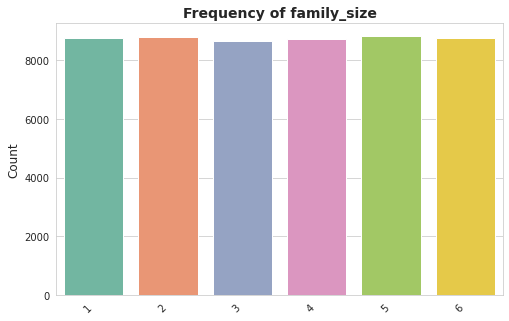

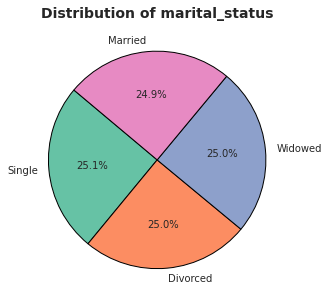

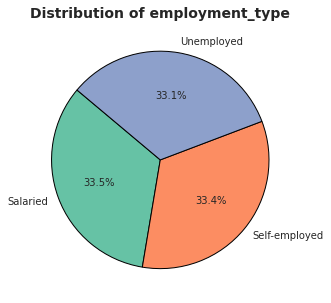

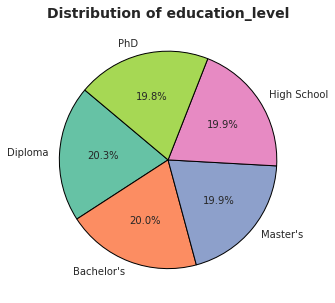

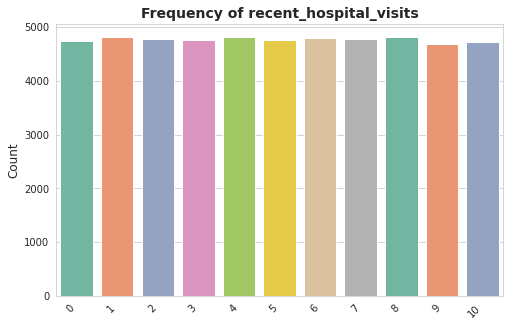

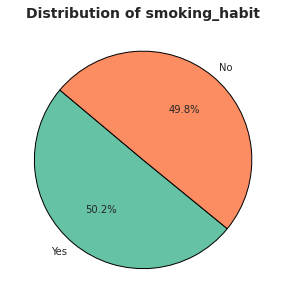

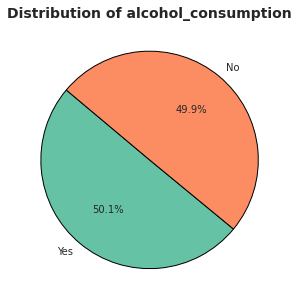

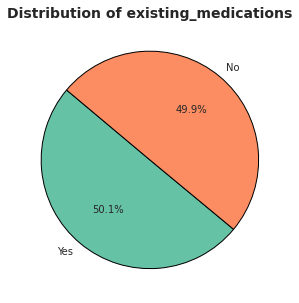

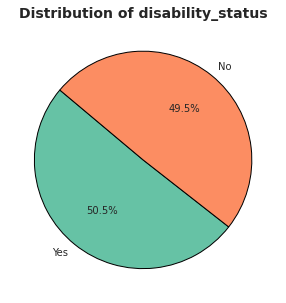

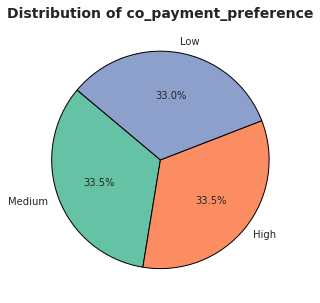

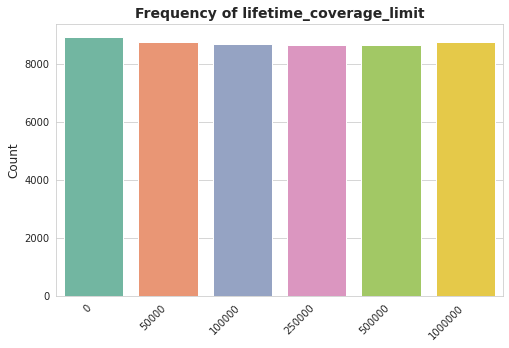

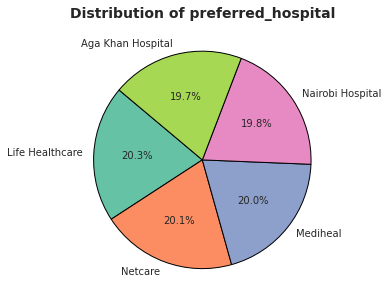

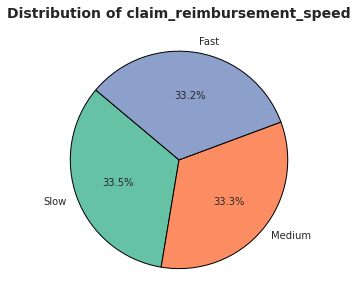

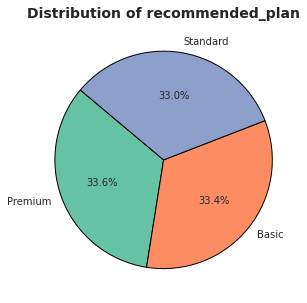

In [53]:
univariate_analysis(df)